### 4차 프로그래밍 과제

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 1 to 209
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MYCT    209 non-null    float64
 1   MMIN    209 non-null    float64
 2   MMAX    209 non-null    float64
 3   CACH    209 non-null    float64
 4   CHMIN   209 non-null    float64
 5   CHMAX   209 non-null    float64
 6   PRP     209 non-null    float64
dtypes: float64(7)
memory usage: 13.1 KB
None
              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     110.000000   2000.000000   8000.000000    8.000000    2.000000   
75% 

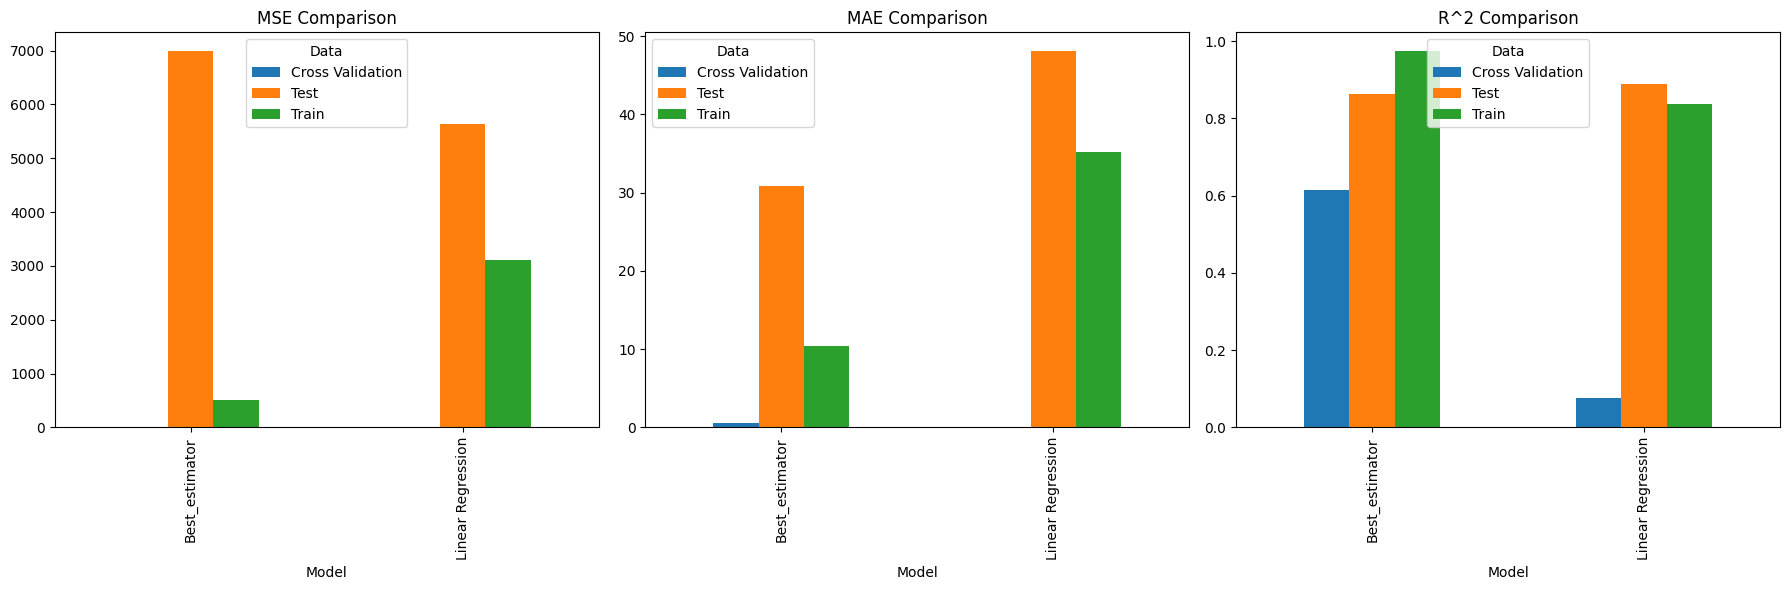

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# 데이터 로드
file_path = 'machine.data.csv'
df = pd.read_csv(file_path, header=None)

# 컬럼 이름 추가
df.columns = ['VendorName', 'ModelName', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP']

# 필요 없는 열 제거
df = df.drop(['VendorName', 'ModelName'], axis=1)

# 비수치 값이 있는 행 제거
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

# 데이터 요약
print(df.info())
print(df.describe())

# 타겟 변수와 특징 변수 분리
X = df[['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']]
y = df['PRP']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 기본 선형 회귀 모델 설정
basic_model = LinearRegression()
basic_model.fit(X_train, y_train)

# 기본 모델 예측
y_train_pred_basic = basic_model.predict(X_train)
y_test_pred_basic = basic_model.predict(X_test)

# 기본 모델 성능 평가
mse_train_basic = mean_squared_error(y_train, y_train_pred_basic)
mae_train_basic = mean_absolute_error(y_train, y_train_pred_basic)
r2_train_basic = r2_score(y_train, y_train_pred_basic)

mse_test_basic = mean_squared_error(y_test, y_test_pred_basic)
mae_test_basic = mean_absolute_error(y_test, y_test_pred_basic)
r2_test_basic = r2_score(y_test, y_test_pred_basic)

# 기본 모델 교차 검증
cross_val_scores_basic = cross_val_score(basic_model, X, y, cv=10, scoring='r2')
cross_val_mean_basic = cross_val_scores_basic.mean()

# 기본 모델 성능 출력
print(f'Basic Model Train MSE: {mse_train_basic}')
print(f'Basic Model Train MAE: {mae_train_basic}')
print(f'Basic Model Train R2: {r2_train_basic}')
print(f'Basic Model Test MSE: {mse_test_basic}')
print(f'Basic Model Test MAE: {mae_test_basic}')
print(f'Basic Model Test R2: {r2_test_basic}')
print(f'Basic Model Cross-Validation R2: {cross_val_mean_basic}')

# 파이프라인 설정
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# 하이퍼파라미터 그리드 설정
param_grid = [
    {'model': [LinearRegression()]},
    {'model': [Ridge()], 'model__alpha': [0.1, 1, 10]},
    {'model': [Lasso()], 'model__alpha': [0.1, 1, 10]},
    {'model': [RandomForestRegressor()], 'model__n_estimators': [100, 200], 'model__max_features': ['sqrt', 'log2', None]}
]

# 그리드 서치 설정
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')

# 모델 학습
grid_search.fit(X_train, y_train)

# 베스트 모델 선택
best_model = grid_search.best_estimator_

# 예측
y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)

# 성능 평가
mse_train_best = mean_squared_error(y_train, y_train_pred_best)
mae_train_best = mean_absolute_error(y_train, y_train_pred_best)
r2_train_best = r2_score(y_train, y_train_pred_best)

mse_test_best = mean_squared_error(y_test, y_test_pred_best)
mae_test_best = mean_absolute_error(y_test, y_test_pred_best)
r2_test_best = r2_score(y_test, y_test_pred_best)

# 교차 검증
cross_val_scores_best = cross_val_score(best_model, X, y, cv=10, scoring='r2')
cross_val_mean_best = cross_val_scores_best.mean()

# 성능 출력
print(f'Best Model Train MSE: {mse_train_best}')
print(f'Best Model Train MAE: {mae_train_best}')
print(f'Best Model Train R2: {r2_train_best}')
print(f'Best Model Test MSE: {mse_test_best}')
print(f'Best Model Test MAE: {mae_test_best}')
print(f'Best Model Test R2: {r2_test_best}')
print(f'Best Model Cross-Validation R2: {cross_val_mean_best}')

# 결과 저장
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Linear Regression', 'Best_estimator', 'Best_estimator', 'Linear Regression', 'Best_estimator'],
    'Data': ['Train', 'Test', 'Train', 'Test', 'Cross Validation', 'Cross Validation'],
    'MSE': [mse_train_basic, mse_test_basic, mse_train_best, mse_test_best, cross_val_mean_basic, cross_val_mean_best],
    'MAE': [mae_train_basic, mae_test_basic, mae_train_best, mae_test_best, cross_val_mean_basic, cross_val_mean_best],
    'R^2': [r2_train_basic, r2_test_basic, r2_train_best, r2_test_best, cross_val_mean_basic, cross_val_mean_best]
})

# 성능 지표 바 차트로 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

results.pivot(index="Model", columns="Data", values="MSE").plot(kind='bar', ax=axes[0], title='MSE Comparison')
results.pivot(index="Model", columns="Data", values="MAE").plot(kind='bar', ax=axes[1], title='MAE Comparison')
results.pivot(index="Model", columns="Data", values="R^2").plot(kind='bar', ax=axes[2], title='R^2 Comparison')

plt.tight_layout()
plt.show()